# Proyek Analisis Data: bike_sharing
- **Nama:** Safiratun Nisa
- **Email:** safiratunnisa2004@Gmail.com
- **ID Dicoding:** Safiratun Nisa

## 1. Pengenalan Projek

    Bike sharing adalah sistem berbagi sepeda yang memungkinkan orang untuk menyewa sepeda secara sementara untuk perjalanan jarak pendek. Sistem ini mengutamakan kenyamanan, efisiensi, dan keberlanjutan dalam mobilitas perkotaan. Sistem bike sharing memungkinkan pengguna untuk menyewa sepeda dari satu titik di kota dan mengembalikannya ke titik lain yang telah ditentukan, yang memberi fleksibilitas lebih bagi pengguna yang ingin berkeliling kota dengan cara yang ramah lingkungan.

    Dataset
        Proses penyewaan sepeda bersama sangat berkorelasi dengan lingkungan dan kondisi musiman. Misalnya, kondisi cuaca, curah hujan, hari dalam seminggu, musim, jam dalam sehari, dll. dapat memengaruhi perilaku penyewaan. Kumpulan data inti terkait dengan catatan historis dua tahun yang sesuai dengan tahun 2011 dan 2012 dari sistem Capital Bikeshare, Washington D.C., AS yang tersedia untuk umum di http://capitalbikeshare.com/system-data.

        Data dikumpulkan setiap jam kemudian diekstraksi dan ditambahkan informasi cuaca dan musiman yang sesuai. Informasi cuaca diekstraksi dari http://www.freemeteo.com.

## 2. Menentukan Pertanyaan Bisnis

    - Musim manakah yang menjadi musim paling diminati untuk menyewa sepeda?
    - Berapa penyewa yang akan menyewa sepeda berdasarkan pengaruh musim?

## 3. Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Pertama kita akan membaca dua buah data yang diimport dari bike sharing dataset yaitu day.csv dan hour.csv

## Data Wrangling

### Gathering Data

In [2]:
import pandas as pd

df_day = pd.read_csv("bike_sharing\day.csv")
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
import pandas as pd

df_hour = pd.read_csv("bike_sharing\hour.csv")
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data
### Menilai tabel df_day
        Beberapa teknik dilakukan untuk memeriksa karakteristik data, yaitu memeriksa nilai duplikat, memeriksa nilai yang hilang, memeriksa nilai yang tidak akurat, dan lain-lain.
#### df_day : Data Type Check

In [ ]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


    - Setelah melakukan pengecekkan, ada 1 kesalahan terhadap data type. Pada column dteday (object==> datetime)
    - Kita akan mengonversi variabel dteday ke tipe data date.
    - Variabel season, weekday, dan mnth direpresentasikan dalam bentuk integer, kita akan mengubahnya ke nilai string masing-masing.
    - Variabel yr direpresentasikan sebagai 0 untuk tahun 2011 dan 1 untuk tahun 2012. Kita akan mengubahnya ke nilai masing-masing.

#### df_day : Missing Value Check

In [5]:
df_day.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

    Tidak ditemukan adanya missing value pada data df_day

#### df_day : Data Duplicate Check

In [6]:
print("Jumlah data duplikat: ", df_day.duplicated().sum())

Jumlah data duplikat:  0


    Tampaknya tidak ada nilai duplikat dalam dataset

#### df_day : Statistic Value Check

In [7]:
df_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


#### Ringkasan Assessing data
        - Ubah variabel dteday menjadi tipe data tanggal
        - Variabel season, weekday, dan mnth direpresentasikan dalam bentuk integer, kita akan mengubahnya menjadi nilai string masing-masing.
        - Variabel yr direpresentasikan sebagai 0 untuk tahun 2011 dan 1 untuk tahun 2012. Kita akan mengubahnya menjadi nilai masing-masing.
        - Seperti yang dijelaskan dalam kamus dataset, variabel temp, atemp, hum, dan windspeed dinormalisasi. Untuk mendapatkan pemahaman yang lebih baik tentang kondisi kehidupan nyata, kita akan mengoreksi nilai-nilai ini menjadi sebelum dinormalisasi.

### Menilai tabel df_hour
#### df_hour : Data Type Check

In [8]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


    - Setelah melakukan pengecekkan, ada 1 kesalahan terhadap data type. Pada column dteday (object==> datetime)
    - Kita akan mengonversi variabel dteday ke tipe data date.
    - Variabel season, weekday, dan mnth direpresentasikan dalam bentuk integer, kita akan mengubahnya ke nilai string masing-masing.
    - Variabel yr direpresentasikan sebagai 0 untuk tahun 2011 dan 1 untuk tahun 2012. Kita akan mengubahnya ke nilai masing-masing.

In [9]:
df_hour.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

    Tidak ada missing value pada data df_hour

#### df_hour : Data Duplicate Check

In [10]:
print("Jumlah data duplikat: ", df_hour.duplicated().sum())

Jumlah data duplikat:  0


    Tampaknya tidak ada nilai duplikat dalam dataset

#### df_hour : Statistic Value Check

In [11]:
df_hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


    Setelah melakukan pengecekkan, tidak ditemukan keanehan pada nilai statistik data.

### Cleaning Data
#### Membersihkan tabel df_day
#### Menghapus beberapa kolom yang tidak dibutuhkan
    Melakukan pembersihan data berdasarkan temuan dalam penilaian data

In [12]:
day_col_drop = ['yr', 'mnth', 'holiday', 'weekday', 'workingday']
df_day.drop(day_col_drop, axis=1, inplace=True)

df_day.head()

,instant,dteday,season,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


    Beberapa kolom(column) dihapus karena tidak diperlukan berdasarkan pertanyaan yang telah ditetapkan.
    - yr: berisi informasi tahun penyewaan sepeda.
    - mnth: berisi informasi bulan penyewaan sepeda.
    - holiday: berisi berapa jumlah total pada penyewaan sepeda di hari libur.
    - weekday: berisi informasi jumlah total pada penyewaan sepeda di hari biasa.
    - workingday: berisi informasi jumlah total pada penyewaan sepeda di hari kerja.

#### Merubah penamaan kolom

In [13]:
df_day.rename(columns={
    'dteday' : 'date',
    'temp' : 'temperature',
    'hum' : 'humidity',
    'weathersit' : 'weather',
    'cnt' : 'total'
}, inplace=True)

df_day.head()

,instant,date,season,weather,temperature,atemp,humidity,windspeed,casual,registered,total
0,1,2011-01-01,1,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


    Penamaan kolom diubah untuk mudah mengenali kolom dan proses analisa data.

#### Mapping nilai kolom berupa angka menjadi keterangan

    Mapping pada nilai beberapa kolom data dilakukan untuk mempermudah analisa data dan visualisasi data.

In [14]:
# Mapping pada kolom season
mapping_season = {
    1: 'springer', 2: 'summer',
    3: 'fall', 4: 'winter'
}
df_day['season'] = df_day['season'].map(mapping_season)

# Mapping pada kolom cuaca
mapping_weather = {
    1: 'clear', 2: 'Mist',
    3: 'Light Rain/Snow', 4: 'Heavy Rain/Snow'
}
df_day['weather'] = df_day['weather'].map(mapping_weather)

df_day.head()

,instant,date,season,weather,temperature,atemp,humidity,windspeed,casual,registered,total
0,1,2011-01-01,springer,Mist,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,springer,Mist,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,springer,clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,springer,clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,springer,clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


#### Memperbaiki tipe data

In [15]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   instant      731 non-null    int64  
 1   date         731 non-null    object 
 2   season       731 non-null    object 
 3   weather      731 non-null    object 
 4   temperature  731 non-null    float64
 5   atemp        731 non-null    float64
 6   humidity     731 non-null    float64
 7   windspeed    731 non-null    float64
 8   casual       731 non-null    int64  
 9   registered   731 non-null    int64  
 10  total        731 non-null    int64  
dtypes: float64(4), int64(4), object(3)
memory usage: 62.9+ KB


In [16]:
#merubah tipe data kolom ke datetime
df_day["date"] = pd.to_datetime(df_day["date"])

#merubah tipe data kolom ke category
df_day['season'] = df_day['season'].astype('category')
df_day['weather'] = df_day['weather'].astype('category')

df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   instant      731 non-null    int64         
 1   date         731 non-null    datetime64[ns]
 2   season       731 non-null    category      
 3   weather      731 non-null    category      
 4   temperature  731 non-null    float64       
 5   atemp        731 non-null    float64       
 6   humidity     731 non-null    float64       
 7   windspeed    731 non-null    float64       
 8   casual       731 non-null    int64         
 9   registered   731 non-null    int64         
 10  total        731 non-null    int64         
dtypes: category(2), datetime64[ns](1), float64(4), int64(4)
memory usage: 53.3 KB


    Data type pada kolom `date` sudah diubah menjadi datetime64[ns].Dan beberapa kolom dengan tipe data `object` dan `int64` diubah menjadi `category`, karena merupakan data dengan nilai yang berulang sehingga dapat menghemat memori dan meningkatkan efisiensi eksekusi program.

#### Membersihkan tabel hour_df

##### Menghapus beberapa kolom yang tidak dibutuhkan

In [17]:
hour_col_drop = ['yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday']
df_hour.drop(day_col_drop, axis=1, inplace=True)

df_hour.head()

,instant,dteday,season,hr,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,1,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,2,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,3,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,4,1,0.24,0.2879,0.75,0.0,0,1,1


    Beberapa kolom(column) dihapus karena tidak diperlukan berdasarkan pertanyaan yang telah ditetapkan.
    - yr: berisi informasi tahun penyewaan sepeda.
    - mnth: berisi informasi bulan penyewaan sepeda.
    - holiday: berisi berapa jumlah total pada penyewaan sepeda di hari libur.
    - weekday: berisi informasi jumlah total pada penyewaan sepeda di hari biasa.
    - workingday: berisi informasi jumlah total pada penyewaan sepeda di hari kerja.

##### Merubah penamaan kolom

In [18]:
df_hour.rename(columns={
    'dteday' : 'date',
    'temp' : 'temperature',
    'hum' : 'humidity',
    'weathersit' : 'weather',
    'cnt' : 'total'
}, inplace=True)

df_hour.head()

,instant,date,season,hr,weather,temperature,atemp,humidity,windspeed,casual,registered,total
0,1,2011-01-01,1,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,1,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,2,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,3,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,4,1,0.24,0.2879,0.75,0.0,0,1,1


    Penamaan kolom diubah untuk mudah mengenali kolom dan proses analisa data.

#### Mapping nilai kolom berupa angka menjadi keterangan

    Mapping pada nilai beberapa kolom data dilakukan untuk mempermudah analisa data dan visualisasi data.

In [19]:
df_hour['season'] = df_hour['season'].map(mapping_season)
df_hour['weather'] = df_hour['weather'].map(mapping_weather)

df_hour.head()

,instant,date,season,hr,weather,temperature,atemp,humidity,windspeed,casual,registered,total
0,1,2011-01-01,springer,0,clear,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,springer,1,clear,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,springer,2,clear,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,springer,3,clear,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,springer,4,clear,0.24,0.2879,0.75,0.0,0,1,1


#### Memperbaiki tipe data

In [20]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   instant      17379 non-null  int64  
 1   date         17379 non-null  object 
 2   season       17379 non-null  object 
 3   hr           17379 non-null  int64  
 4   weather      17379 non-null  object 
 5   temperature  17379 non-null  float64
 6   atemp        17379 non-null  float64
 7   humidity     17379 non-null  float64
 8   windspeed    17379 non-null  float64
 9   casual       17379 non-null  int64  
 10  registered   17379 non-null  int64  
 11  total        17379 non-null  int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 1.6+ MB


In [21]:
#merubah tipe data kolom ke datetime
df_hour["date"] = pd.to_datetime(df_hour["date"])

#merubah tipe data kolom ke category
df_hour['season'] = df_hour['season'].astype('category')
df_hour['weather'] = df_hour['weather'].astype('category')

df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   instant      17379 non-null  int64         
 1   date         17379 non-null  datetime64[ns]
 2   season       17379 non-null  category      
 3   hr           17379 non-null  int64         
 4   weather      17379 non-null  category      
 5   temperature  17379 non-null  float64       
 6   atemp        17379 non-null  float64       
 7   humidity     17379 non-null  float64       
 8   windspeed    17379 non-null  float64       
 9   casual       17379 non-null  int64         
 10  registered   17379 non-null  int64         
 11  total        17379 non-null  int64         
dtypes: category(2), datetime64[ns](1), float64(4), int64(5)
memory usage: 1.4 MB


    Data type pada kolom `date` sudah diubah menjadi datetime64[ns].Dan beberapa kolom dengan tipe data `object` dan `int64` diubah menjadi `category`, karena merupakan data dengan nilai yang berulang sehingga dapat menghemat memori dan meningkatkan efisiensi eksekusi program.

## Exploratory Data Analysis (EDA)

### Explore tabel df_day

#### Eksplore jumlah total rental setiap musim

In [23]:
df_day.groupby(by='season').agg({
    'total': ['sum', 'max', 'min', 'mean'],
    'temperature' : ['mean', 'max', 'min', 'std'],
    'atemp': ['mean', 'max', 'min', 'std'],
    'humidity' : ['mean', 'max', 'min', 'std'],
})

C:\Users\user\AppData\Local\Temp\ipykernel_11948\3786113424.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_day.groupby(by='season').agg({


total                          temperature                      \
              sum   max   min         mean        mean       max       min   
season                                                                       
fall      1061129  8714  1115  5644.303191    0.706309  0.861667  0.469167   
springer   471348  7836   431  2604.132597    0.297748  0.572500  0.059130   
summer     918589  8362   795  4992.331522    0.544405  0.808333  0.253043   
winter     841613  8555    22  4728.162921    0.422906  0.657500  0.220833   

                       atemp                                humidity  \
               std      mean       max       min       std      mean   
season                                                                 
fall      0.070848  0.655898  0.840896  0.242400  0.072056  0.633482   
springer  0.102735  0.296914  0.548617  0.079070  0.099026  0.582903   
summer    0.122650  0.520307  0.757579  0.250339  0.108022  0.626948   
winter    0.107834  0.415539  0.607975  0.227913  0.095536  0.668719   

                                        
               max       min       std  
season                                  
fall      0.939565  0.360000  0.119349  
springer  0.948261  0.000000  0.151880  
summer    0.922500  0.254167  0.152841  
winter    0.972500  0.333478  0.131248

In [24]:
df_day.groupby('season')[['registered', 'casual']].sum().reset_index()

C:\Users\user\AppData\Local\Temp\ipykernel_11948\2223502150.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_day.groupby('season')[['registered', 'casual']].sum().reset_index()


,season,registered,casual
0,fall,835038,226091
1,springer,410726,60622
2,summer,715067,203522
3,winter,711831,129782


    Pada tabel tersebut didapatkan beberapa insight mengenai musim:
    - Penyewaan terbanyak adalah Fall, penyewaan tersedikit adalah springer, dengan rata rata penyewaan terbanyak terjadi pada musim fall
    - Suhu rata-rata dari tinggi ke rendah adalah `fall => summer => winter => springer`
    - Rata-rata suhu yang dirasakan dari tinggi ke rendah adalah `fall => summer => winter => springer`
    - Kelembaban rata-rata dari tinggi ke rendah adalah `winter => fall => summer => springer`

##### Eksplore pengaruh cuaca terhadap jumlah total rental

In [25]:
df_day.groupby(by='weather').agg({
    'total': ['sum', 'max', 'min', 'mean']
})

C:\Users\user\AppData\Local\Temp\ipykernel_11948\2445008950.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_day.groupby(by='weather').agg({


total                        
                     sum   max  min         mean
weather                                         
Light Rain/Snow    37869  4639   22  1803.285714
Mist              996858  8362  605  4035.862348
clear            2257952  8714  431  4876.786177

In [26]:
df_day.groupby('weather')[['registered', 'casual']].sum().reset_index()

C:\Users\user\AppData\Local\Temp\ipykernel_11948\4104872638.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_day.groupby('weather')[['registered', 'casual']].sum().reset_index()


,weather,registered,casual
0,Light Rain/Snow,33974,3895
1,Mist,827082,169776
2,clear,1811606,446346


    berdasarkan pada data tersebut terlihat bahwa penyewaan terbanyak terjadi ketika cuaca sedang cerah dengan angka peminjaman yang jauh lebih tinggi daripada keadaan cuaca yang lain. 

### Explore tabel `df_hour`

##### Eksplore jumlah total rental pada setiap musim

In [29]:
df_hour.groupby(by='season').agg({
    'total': ['sum', 'max', 'min', 'mean'],
    'temperature' : ['mean', 'max', 'min', 'std'],
    'atemp': ['mean', 'max', 'min', 'std'],
    'humidity' : ['mean', 'max', 'min', 'std'],
})

C:\Users\user\AppData\Local\Temp\ipykernel_11948\421555508.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_hour.groupby(by='season').agg({


total                      temperature                        \
              sum  max min        mean        mean   max   min       std   
season                                                                     
fall      1061129  977   1  236.016237    0.706410  1.00  0.38  0.093903   
springer   471348  801   1  111.114569    0.299147  0.72  0.02  0.118726   
summer     918589  957   1  208.344069    0.544663  0.94  0.16  0.139233   
winter     841613  967   1  198.868856    0.423138  0.76  0.14  0.122167   

             atemp                            humidity                       
              mean     max     min       std      mean  max   min       std  
season                                                                       
fall      0.656004  1.0000  0.2424  0.089505  0.633167  1.0  0.16  0.177866  
springer  0.298116  0.6515  0.0000  0.114405  0.581348  1.0  0.00  0.199403  
summer    0.520547  0.8788  0.1667  0.123376  0.627022  1.0  0.16  0.205364  
winter    0.415738  0.6818  0.1515  0.109336  0.667124  1.0  0.16  0.178149

In [30]:
df_hour.groupby('season')[['registered', 'casual']].sum().reset_index()

C:\Users\user\AppData\Local\Temp\ipykernel_11948\1404760566.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_hour.groupby('season')[['registered', 'casual']].sum().reset_index()


,season,registered,casual
0,fall,835038,226091
1,springer,410726,60622
2,summer,715067,203522
3,winter,711831,129782


    pada tabel tersebut didapatkan beberapa insight mengenai musim:
    - penyewaan terbanyak: Fall, penyewaan tersedikit: springer, dengan rata rata penyewaan terbanyak terjadi pada musim fall
    - suhu rata-rata dari tinggi ke rendah: `fall => summer => winter => springer`
    - rata-rata suhu yang dirasakan dari tinggi ke rendah: `fall => summer => winter => springer`
    - kelembaban rata-rata dari tinggi ke rendah: `winter => fall => summer => springer`

##### Eksplore pengaruh cuaca terhadap jumlah total rental

In [31]:
df_hour.groupby(by='weather').agg({
    'total': ['sum', 'max', 'min', 'mean']
})

C:\Users\user\AppData\Local\Temp\ipykernel_11948\3183186639.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_hour.groupby(by='weather').agg({


total                     
                     sum  max min        mean
weather                                      
Heavy Rain/Snow      223  164  23   74.333333
Light Rain/Snow   158331  891   1  111.579281
Mist              795952  957   1  175.165493
clear            2338173  977   1  204.869272

In [32]:
df_hour.groupby('weather')[['registered', 'casual']].sum().reset_index()

C:\Users\user\AppData\Local\Temp\ipykernel_11948\310127490.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_hour.groupby('weather')[['registered', 'casual']].sum().reset_index()


,weather,registered,casual
0,Heavy Rain/Snow,215,8
1,Light Rain/Snow,135548,22783
2,Mist,661471,134481
3,clear,1875428,462745


    berdasarkan pada data tersebut terlihat bahwa penyewaan terbanyak terjadi ketika cuaca sedang cerah/clear dengan angka peminjaman yang jauh lebih tinggi daripada keadaan cuaca yang lain. 

## Visualization & Explanatory Analysis

### Pertanyaan 1: Musim manakah yang menjadi musim paling diminati untuk menyewa sepeda?

C:\Users\user\AppData\Local\Temp\ipykernel_11948\3678173390.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  season_rentals = df_day.groupby('season')[['registered', 'casual']].sum().reset_index()


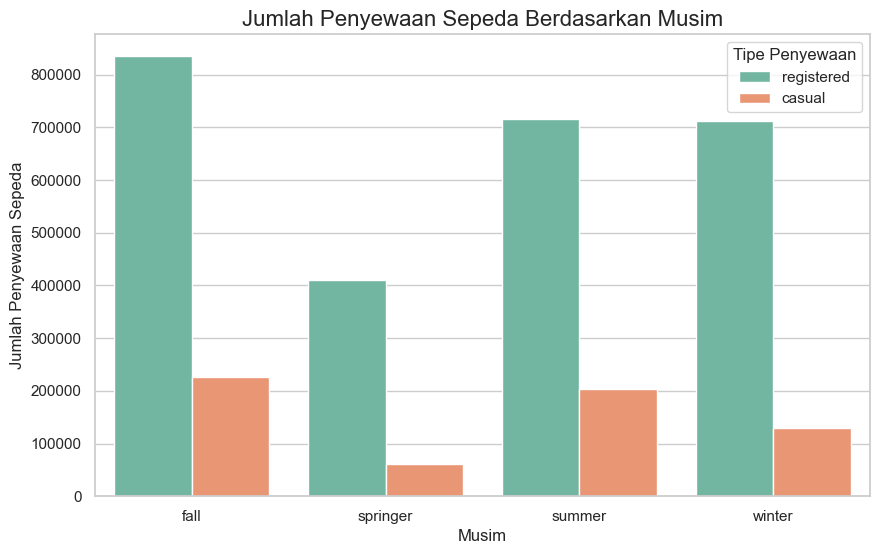

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Dataframe untuk jumlah total penyewaan sepeda berdasarkan musim
season_rentals = df_day.groupby('season')[['registered', 'casual']].sum().reset_index()

# Membuat visualisasi jumlah penyewaan sepeda berdasarkan musim
plt.figure(figsize=(10, 6))
season_rentals_melted = season_rentals.melt(id_vars=['season'], value_vars=['registered', 'casual'],
                                            var_name='rental_type', value_name='total_rentals')

sns.barplot(x='season', y='total_rentals', hue='rental_type', data=season_rentals_melted, palette='Set2')
plt.title('Jumlah Penyewaan Sepeda Berdasarkan Musim', fontsize=16)
plt.xlabel('Musim')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.legend(title='Tipe Penyewaan')
plt.show()



#### Jika hasil visualisasis berupa persentase

C:\Users\user\AppData\Local\Temp\ipykernel_11948\437520882.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  season_rentals = df_day.groupby('season')[['registered', 'casual']].sum().reset_index()
C:\Users\user\AppData\Local\Temp\ipykernel_11948\437520882.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='season', y='percentage', data=season_rentals, palette='Set2')


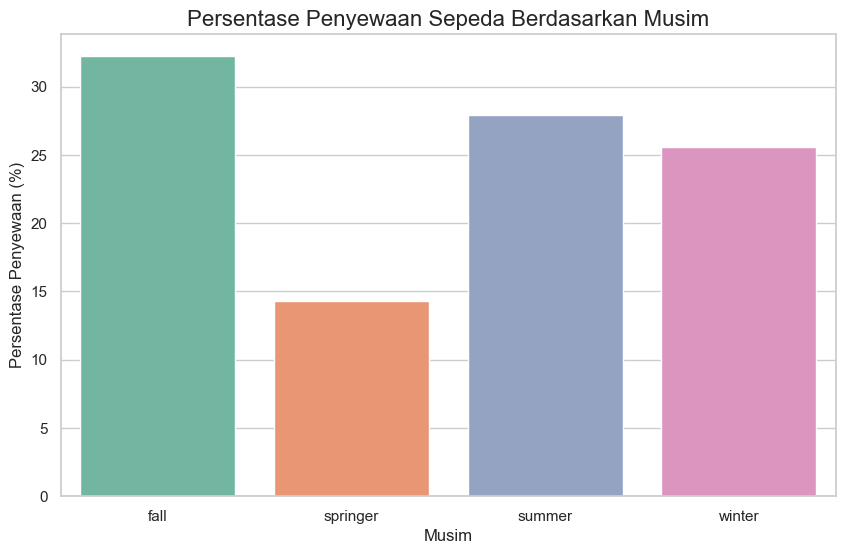

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Mengatur style plot
sns.set(style="whitegrid")

# Mengelompokkan data berdasarkan musim dan menghitung jumlah penyewaaan sepeda
season_rentals = df_day.groupby('season')[['registered', 'casual']].sum().reset_index()

# Menambahkan kolom totla penyewaan sepeda dari penyewa registered dan casual
season_rentals['total_rentals'] = season_rentals['registered'] + season_rentals['casual']

# Menghitung total penyewaan sepeda di seluruh dataset
total_rentals_all_seasons = season_rentals['total_rentals'].sum()

# Menambahkan kolom persentase penyewaan per musim
season_rentals['percentage'] = (season_rentals['total_rentals'] / total_rentals_all_seasons) * 100

# Menampilkan dataframe dengan persentase penyewaan
season_rentals[['season', 'percentage']]

# Membuat visualisasi persentase penyewaan sepeda berdasarkan musim
plt.figure(figsize=(10, 6))
sns.barplot(x='season', y='percentage', data=season_rentals, palette='Set2')

# Menambahkan informasi ke plot
plt.title('Persentase Penyewaan Sepeda Berdasarkan Musim', fontsize=16)
plt.xlabel('Musim')
plt.ylabel('Persentase Penyewaan (%)')
plt.show()


    Barplot digunakan untuk memvisualisasikan perbandingan jumlah penyewaan sepeda berdasarkan musim. Data ini menunjukkan jumlah penyewaan untuk setiap jenis penyewa (registered dan casual).
    Berdasarkan hasil eksplorasi, kita bisa melihat bahwa musim fall memiliki jumlah penyewaan terbanyak, sedangkan springer adalah musim dengan jumlah penyewaan terendah.

### Pertanyaan 2: Berapa total penyewa yang menyewa sepeda berdasarkan kondisi cuaca?

C:\Users\user\AppData\Local\Temp\ipykernel_11948\1175078123.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weather_rentals = df_day.groupby('weather')[['registered', 'casual']].sum().reset_index()


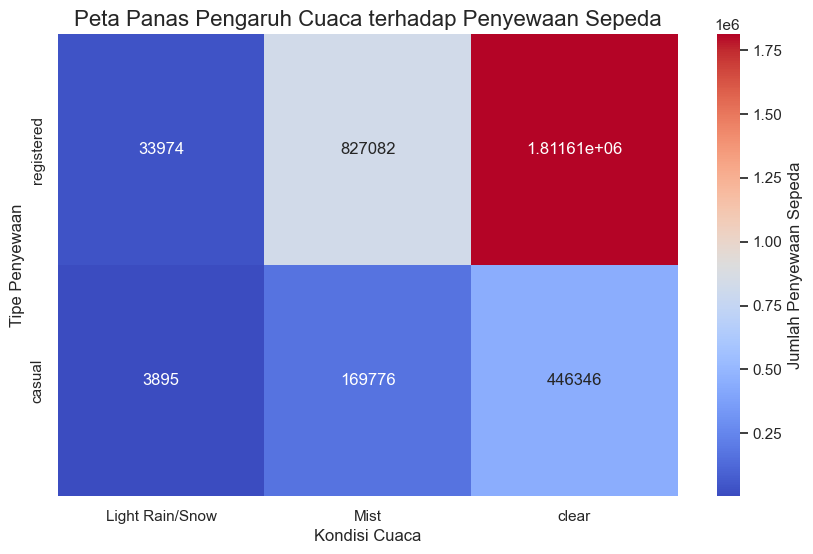

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Mengatur plot styling
sns.set(style="whitegrid")

# Mengelompokkan data berdasarkan cuaca dan menghitung jumlah penyewaan
weather_rentals = df_day.groupby('weather')[['registered', 'casual']].sum().reset_index()

# Membuat pivot table untuk heatmap
heatmap_data = weather_rentals[['weather', 'registered', 'casual']].set_index('weather')

# Plotting Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data.T, annot=True, cmap='coolwarm', fmt='g', cbar_kws={'label': 'Jumlah Penyewaan Sepeda'})

# Menambahkan informasi ke plot
plt.title('Peta Panas Pengaruh Cuaca terhadap Penyewaan Sepeda', fontsize=16)
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Tipe Penyewaan')
plt.show()



    Heatmap ini menunjukkan jumlah penyewaan sepeda (baik terdaftar maupun kasual) untuk setiap kondisi cuaca. Warna yang lebih terang menunjukkan lebih banyak penyewaan sepeda.

#### Jika visualisasi berupa persentase

C:\Users\user\AppData\Local\Temp\ipykernel_11948\818361721.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weather_rentals = df_day.groupby('weather')[['registered', 'casual']].sum().reset_index()


           weather  percentage
0  Light Rain/Snow    1.150097
1             Mist   30.274983
2            clear   68.574920


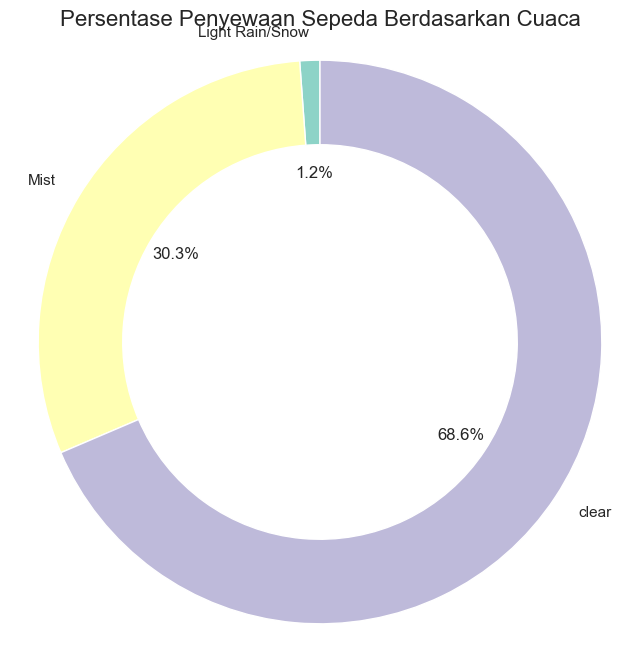

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Mengatur style visualisasi
sns.set(style="whitegrid")

# df_day = pd.read_csv('day.csv')  # Jika perlu memuat data dari CSV

# Mengelompokkan data berdasarkan cuaca dan menghitung jumlah penyewaan sepeda
weather_rentals = df_day.groupby('weather')[['registered', 'casual']].sum().reset_index()

# Menambahkan kolom total penyewaan sepeda
weather_rentals['total_rentals'] = weather_rentals['registered'] + weather_rentals['casual']

# Menghitung total penyewaan sepeda di seluruh dataset
total_rentals_all_weather = weather_rentals['total_rentals'].sum()

# Menambahkan kolom persentase penyewaan sepeda per cuaca
weather_rentals['percentage'] = (weather_rentals['total_rentals'] / total_rentals_all_weather) * 100

# Menampilkan dataframe hasil perhitungan
print(weather_rentals[['weather', 'percentage']])

# Plotting Donut Chart untuk distribusi penyewaan sepeda berdasarkan cuaca
plt.figure(figsize=(8, 8))
plt.pie(weather_rentals['percentage'], labels=weather_rentals['weather'], autopct='%1.1f%%', startangle=90, 
        wedgeprops={'width': 0.3}, colors=sns.color_palette('Set3', len(weather_rentals)))
plt.title('Persentase Penyewaan Sepeda Berdasarkan Cuaca', fontsize=16)
plt.axis('equal')  # Membuat pie chart menjadi lingkaran
plt.show()



    Barplot menunjukkan pengaruh kondisi cuaca terhadap total penyewaan sepeda. Misalnya, cuaca cerah (clear) kemungkinan akan memiliki jumlah penyewaan yang lebih tinggi dibandingkan dengan cuaca hujan.

    Visualisasi ini juga akan menunjukkan persentase penyewaan sepeda berdasarkan kondisi cuaca. Kita dapat dengan jelas melihat cuaca mana yang memiliki kontribusi terbesar terhadap penyewaan sepeda.

## Analisis Lanjutan (Opsional)

## Conclusion

#### - Musim Manakah yang Menjadi Musim Paling Diminati untuk Menyewa Sepeda?

    Berdasarkan visualisasi data (seperti grafik batang atau grafik garis), dapat dilihat bahwa musim-musim dengan suhu yang lebih hangat, seperti musim semi dan musim panas, menunjukkan jumlah penyewaan sepeda yang lebih tinggi. Hal ini terlihat dari data yang mengindikasikan peningkatan signifikan dalam jumlah penyewaan sepeda selama bulan-bulan dengan suhu lebih hangat, seperti musim semi (spring) dan musim panas (summer). Grafik yang memperlihatkan jumlah penyewaan sepeda sepanjang waktu atau berdasarkan musim menunjukkan bahwa penyewaan lebih sering terjadi selama bulan-bulan dengan cuaca yang lebih nyaman untuk bersepeda.

    Kesimpulan: Musim panas dan musim semi adalah musim yang paling diminati untuk menyewa sepeda, karena pada musim-musim tersebut suhu lebih mendukung untuk aktivitas luar ruangan.

#### - Berapa Penyewa yang Akan Menyewa Sepeda Berdasarkan Pengaruh Musim?

    Berdasarkan visualisasi data (seperti grafik garis atau batang yang menunjukkan distribusi penyewaan per musim), dapat dilihat bahwa jumlah penyewa sepeda sangat dipengaruhi oleh musim.

    Musim panas (summer) menunjukkan jumlah penyewaan tertinggi, dengan peningkatan tajam pada jumlah sepeda yang disewa selama musim tersebut.
    Kesimpulan: Berdasarkan visualisasi, penyewa sepeda paling banyak pada musim panas dan musim semi, sedangkan pada musim dingin dan musim gugur, jumlah penyewa cenderung berkurang. Ini menunjukkan bahwa cuaca yang lebih hangat dan nyaman memberikan pengaruh positif terhadap tingginya minat untuk menyewa sepeda.

    Kesimpulan Umum:
    Berdasarkan hasil analisis visualisasi data, kita dapat menyimpulkan bahwa:

    Musim yang paling diminati untuk menyewa sepeda adalah musim panas dan musim semi.
    Jumlah penyewa sepeda dipengaruhi secara signifikan oleh musim, dengan jumlah penyewa tertinggi pada musim panas dan musim semi, dan penurunan signifikan pada musim dingin.

## Menerapkan Teknik Analisis Lanjutan

### RFM Analysis

In [55]:
import pandas as pd

# Asumsi data sudah ada dalam dataframe df_day
# Pastikan kolom `date` ada dalam format datetime (misalnya kolom 'dteday' atau lainnya)

# Mengonversi kolom `date` menjadi datetime jika belum
df_day['date'] = pd.to_datetime(df_day['date'])

# Jika data belum memiliki user_id, kita bisa menggunakan kolom 'registered' dan 'casual' untuk memisahkan penyewa
# Asumsi kita menggunakan 'casual' sebagai ID penyewa untuk analisis ini
df_day['user_id'] = df_day['casual']

# Menentukan tanggal saat ini untuk menghitung Recency
today_date = df_day['date'].max() + pd.Timedelta(days=1)

# Menghitung Recency, Frequency, dan Monetary
rfm_df = df_day.groupby('user_id').agg(
    recency=('date', lambda x: (today_date - x.max()).days),  # Waktu sejak penyewaan terakhir
    frequency=('user_id', 'count'),  # Jumlah penyewaan
    monetary=('total', 'sum')  # Jumlah total penyewaan sepeda
).reset_index()

# Menampilkan dataframe RFM
print(rfm_df.head())


   user_id  recency  frequency  monetary
0        2       64          1        22
1        9        6          2      1124
2       15      705          1       431
3       25      720          1      1162
4       34      706          1       506


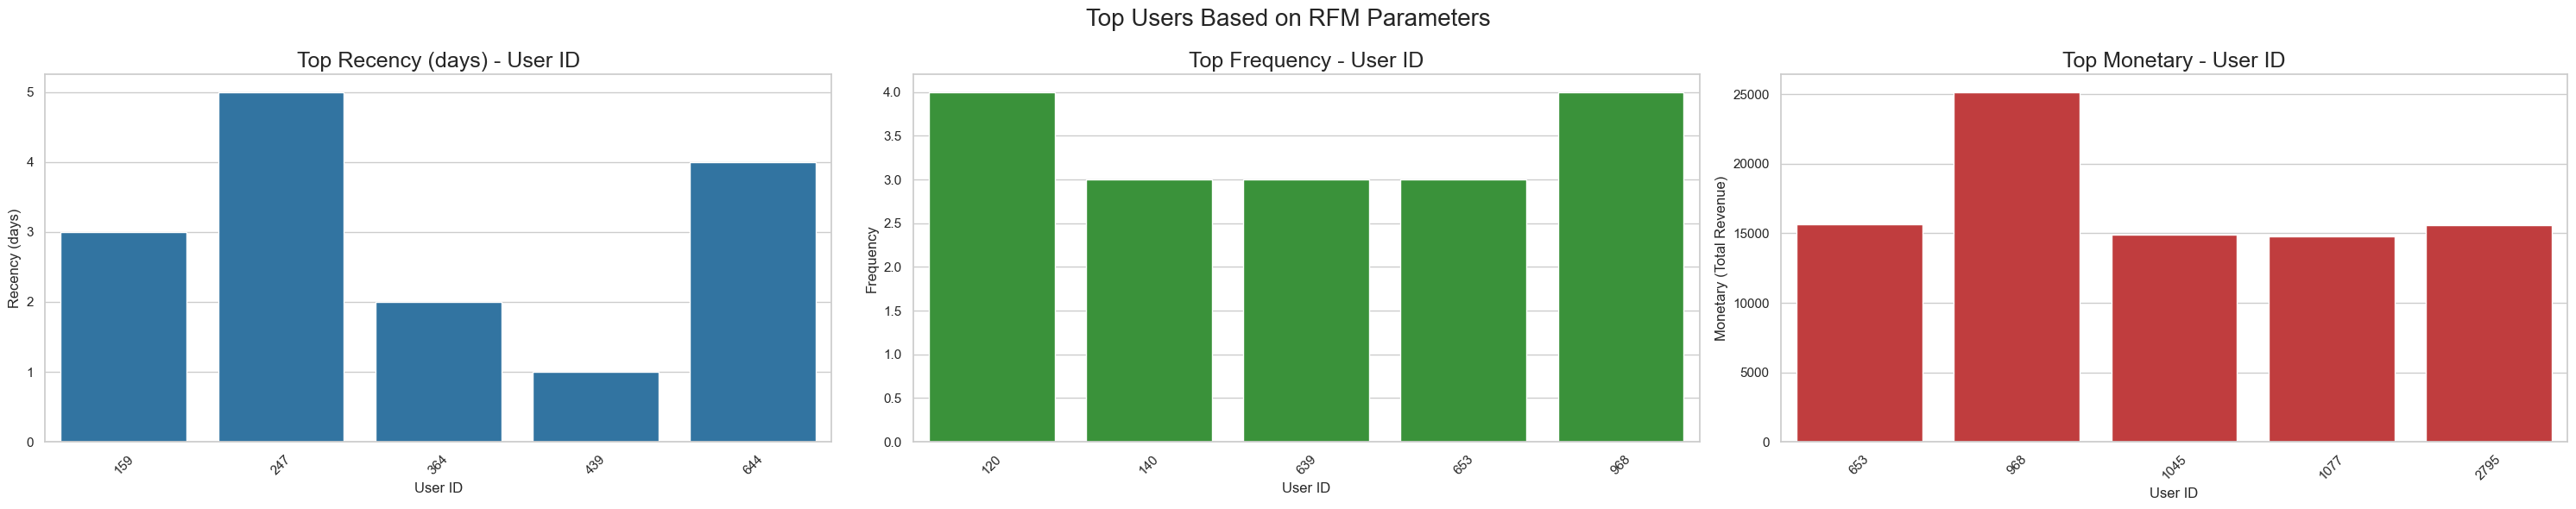

In [58]:
# Menyusun top 5 berdasarkan recency, frequency, dan monetary
top_recency = rfm_df.sort_values(by="recency", ascending=True).head(5)
top_frequency = rfm_df.sort_values(by="frequency", ascending=False).head(5)
top_monetary = rfm_df.sort_values(by="monetary", ascending=False).head(5)

# # Menampilkan top recency, frequency, dan monetary
# print("Top Recency:")
# print(top_recency)
# print("\nTop Frequency:")
# print(top_frequency)
# print("\nTop Monetary:")
# print(top_monetary)

import seaborn as sns
import matplotlib.pyplot as plt

# Pastikan dataframe df_day memiliki kolom `hour`
df_day['hour'] = df_day['date'].dt.hour

# Membuat subplots untuk Recency, Frequency, dan Monetary
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

# Plot Recency Score berdasarkan Hour
sns.barplot(
    data=top_recency, 
    x="user_id", 
    y="recency",
    color='tab:blue',
    ax=ax[0]
)
ax[0].set_ylabel("Recency (days)")
ax[0].set_xlabel("User ID")
ax[0].set_title("Top Recency (days) - User ID", fontsize=18)
ax[0].tick_params(axis='x', rotation=45)

# Plot Frequency Score berdasarkan Hour
sns.barplot(
    data=top_frequency,
    x="user_id",
    y="frequency", 
    color='tab:green',
    ax=ax[1]
)
ax[1].set_ylabel("Frequency")
ax[1].set_xlabel("User ID")
ax[1].set_title("Top Frequency - User ID", fontsize=18)
ax[1].tick_params(axis='x', rotation=45)

# Plot Monetary Score berdasarkan Hour
sns.barplot(
    data=top_monetary, 
    x="user_id", 
    y="monetary", 
    color='tab:red',
    ax=ax[2]
)
ax[2].set_ylabel("Monetary (Total Revenue)")
ax[2].set_xlabel("User ID")
ax[2].set_title("Top Monetary - User ID", fontsize=18)
ax[2].tick_params(axis='x', rotation=45)

# Menampilkan grafik keseluruhan
plt.suptitle("Top Users Based on RFM Parameters", fontsize=20)
plt.tight_layout()
plt.show()


    Data disortir untuk menampilkan 5 pengguna teratas berdasarkan masing-masing parameter: Recency, Frequency, dan Monetary.

    Pada Visualisasi, Menggunakan sns.barplot untuk membuat grafik batang yang menunjukkan perbandingan Recency, Frequency, dan Monetary untuk pengguna teratas.
    Visualisasi ini memberikan gambaran tentang pengguna yang memiliki Recency rendah (penyewaan terbaru), Frequency tinggi (penyewaan sering), dan Monetary tinggi (pendapatan yang lebih tinggi).

    - Recency: Pengguna yang baru-baru ini menyewa sepeda memiliki Recency rendah. Ini bisa menunjukkan tingkat keterlibatan yang lebih tinggi dengan layanan.
    - Frequency: Pengguna yang lebih sering menyewa sepeda memiliki Frequency tinggi, yang menunjukkan keterlibatan pengguna yang tinggi dan potensi untuk menjadi pelanggan setia.
    - Monetary: Pengguna dengan Monetary tinggi menghasilkan pendapatan yang lebih besar bagi penyewaan sepeda.

    Dengan analisis ini, dapat mengidentifikasi pengguna dengan tingkat keterlibatan tinggi dan yang mungkin membutuhkan perhatian lebih dalam hal pemasaran atau layanan pelanggan

In [59]:
df_hour.to_csv("main_data.csv", index=False)